# Lending Club Data Analysis
The goal of iPython script is to provide some useful insights about the Lending Club Loan dataset for data exploration. The Lending Club Loan dataset can be accessed by the URL provided as follows:
[Lending Club Loan Dataset](https://www.kaggle.com/wendykan/lending-club-loan-data)

This script provides two visualizations and two statistics that summarize some important characteristics 
hidden in the dataset in the [Visualization](#visualization) and [Findings](#findings) sections.


# Outline
1. [About the Lending Club](#about)<br>
    a.[What is Lending Club](#what_is)<br>
    b.[Working Principle](#working_principle)<br>
2. [Dataset](#dataset)<br>
3. [Data Cleaning](#data_cleaning)<br>
4. [Data Aggregation](#data_aggregation)<br>
5. [Visualization](#visualization)<br>
    a. [Finding1](#finding1)<br>
    a. [Finding2](#finding2)<br>
6. [Summary](#summary)


# About the Lending Club:
<a id="about"></a>

## What is Lending Club?
<a id="what_is"></a>
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. 
It was the first peer-to-peer lender to register its offerings as securities with 
the Securities and Exchange Commission, and to offer loan trading on a secondary market.<br>
Lending Club is the world's largest peer-to-peer lending platform. <br>
Lending Club enables borrowers to create unsecured personal loans between \\$1,000 and \\$40,000.<br> 
The standard loan period is three years. 
Investors can search and browse the loan listings on Lending Club website 
and select loans that they want to invest in based on the information supplied about the borrower, 
amount of loan, loan grade, and loan purpose. Investors make money from interest. 
Lending Club makes money by charging borrowers an origination fee and investors a service fee.<br>
Sources: [Lending Club Wikipedia Page](https://en.wikipedia.org/wiki/Lending_Club),
[Official Lending Club Web Page](https://www.lendingclub.com/)<br>


## Working Principle of Lending Club
<a id="working_principle"></a>
1. Borrowers create an account
2. Investors open an account
3. Borrowers apply for loans and wait for approval
3. Borrowers get credit check
4. Borrowers get funded if they meet certain criteria, such as
    * Minimum credit score of 600
    * Minimum credit history of 3 years
    * Debt-to-income ratio of less than 40% for single applications, 35% for joint applicants
5. Investors build a portfolio that may consist of multiple notes (each portion of a loan is called a note that is worth of $25)
6. Investors earn from the interest borrowers pay
7. Investors may reinvest 

__Side Note:__ LendingClub provides grades for borrowers, which assigns a grade to every approved borrower using credit and income data. Your grade determines what range of interest rates you qualify for and helps investors decide whether to fund your loan. Borrowers can’t see their grades; only investors can.

Below is the web interface of the Lending Club seen by an investor.  

<img src="https://www.lendacademy.com/wp-content/uploads/2013/02/Lending_Club_Browse_Notes.png" alt="working_principle" height="400" width="800" class="center"><br>
Source: [Lending Club Review](https://www.lendacademy.com/lending-club-review/)

# Dataset:
<a id="dataset"></a>
The Lending Club Loan dataset ([Lending Club Loan Dataset](https://www.kaggle.com/wendykan/lending-club-loan-data)) has 74 columns.<br>
These columns are described in the dictionary provided by Kaggle ([Lending Club Loan Dataset Dictionary](https://www.kaggle.com/wendykan/lending-club-loan-data#LCDataDictionary.xlsx)).<br>
The first 10 rows of the dataset, some basic statistics, such as count, min, max, mean, standard deviation, and quantiles, of the columns with numeric values, and the loan dictionary are shown below for better understanding of each column. 


In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 

from plotly import tools 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
init_notebook_mode(connected=True)

# To show the plots inline
%matplotlib inline

loan_df = pd.read_csv('../../input/loan.csv', low_memory=False)

print('The first 10 rows of the given dataset:')

# Show the first 10 rows of the data frame
loan_df.head(10)


The first 10 rows of the given dataset:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
loan_df.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [3]:
# Get some statistics about the columns with numeric types
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [5]:
pd.set_option('display.max_colwidth', 600)
loan_dictionary_df = pd.read_excel("../../input/LCDataDictionary.xlsx").dropna()
pd.options.display.max_rows=100

# Print out the dictionary that describes the columns of the input csv file.
loan_dictionary_df

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


In [6]:
# Some columns that exist in loan dictionary do not exist in the csv file.
not_included_cols = [col for col in loan_dictionary_df['LoanStatNew'] if col not in loan_df.columns]

not_included_cols = pd.DataFrame(not_included_cols)
not_included_cols.columns = ['Columns that do not exist in csv file']
# not_included_cols = [element.replace('\xa0',' ') for element in object_rows]

not_included_cols

,Columns that do not exist in csv file
0,fico_range_high
1,fico_range_low
2,is_inc_v
3,last_fico_range_high
4,last_fico_range_low
5,verified_status_joint
6,total_rev_hi_lim


# Data Cleaning:
<a id="data_cleaning"></a>

Some fields that are not relevant for the analysis are dropped from the pandas created data frame.

In [7]:
# Drop some fields that are not used for data analysis
cols_will_be_dropped = ['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title', 'policy_code']

for col in cols_will_be_dropped:
    if col in loan_df.columns:
        loan_df.drop(col, axis=1, inplace=True)

# Data Aggregation:
<a id="data_aggregation"></a>

In this section, loans are grouped by their term and each group's mean is calculated.
As expected, the mean of loan amount increases as the term increases in month


In [8]:
# Term is the number of payments on the loan. Values are in months and can be either 36 or 60.
# As expected the longer term, which is 60 months, has a higher intereset rate and the total loan 
# amount than the shorter term (i.e., 36 months).
loan_df.groupby("term").agg({"loan_amnt": np.mean, "int_rate":np.mean}, axis = 1).reset_index()

,term,loan_amnt,int_rate
0,36 months,12481.396458,12.018678
1,60 months,20059.809712,16.111596


An interesting visualization could be the distribution of loan status counts.
For the details of each loan status please refer to [loan statuses of Lending Club](https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-)<br>
Among these loan statuses, the following statuses can be considered as __loss__
* Charged Off
* Does not meet the credit policy Status:Charged Off
* Default

Among these loan statuses, the following statuses can be considered as __risky__ with an icreasing risk from top to bottom
* In Grace Period 
* Late (16-30 days)
* Late (31-120 days)

Other loan statuses that are not mentioned above are considered as __good__. These loan statuses are
* Fully paid
* Current
* Does not meet the credit policy Status:Fully paid
* Issued

__Note:__ For simplicty, *Issued* loans are considered as __good__. 
According to a different selection criteria, loans with status of *Issued* may be excluded from the good loans.


In [9]:
# Get the year list from the issue date of the loans
# and store it as a year column
datetime_list = pd.to_datetime(loan_df['issue_d'])
loan_df['year'] = datetime_list.dt.year


# Create categories for loan statuses as good, risky, and lost
lost = ["Charged Off", "Does not meet the credit policy. Status:Charged Off", "Default"]

risky = ["In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]


loan_df['loan_condition'] = np.nan

def loan_condition(status):
    if status in lost:
        return 'Lost'
    elif status in risky:
        return 'Risky'
    else:
        return 'Good'
    
loan_df['loan_condition'] = loan_df['loan_status'].apply(loan_condition)

# Print the total number of good, lost, and risky loans.
print('The number of Good, Lost, and Risky Loans:')
loan_df["loan_condition"].value_counts()

The number of Good, Lost, and Risky Loans:


Good     819950
Lost      47228
Risky     20201
Name: loan_condition, dtype: int64

# Visualization:
<a id="visualization"></a>

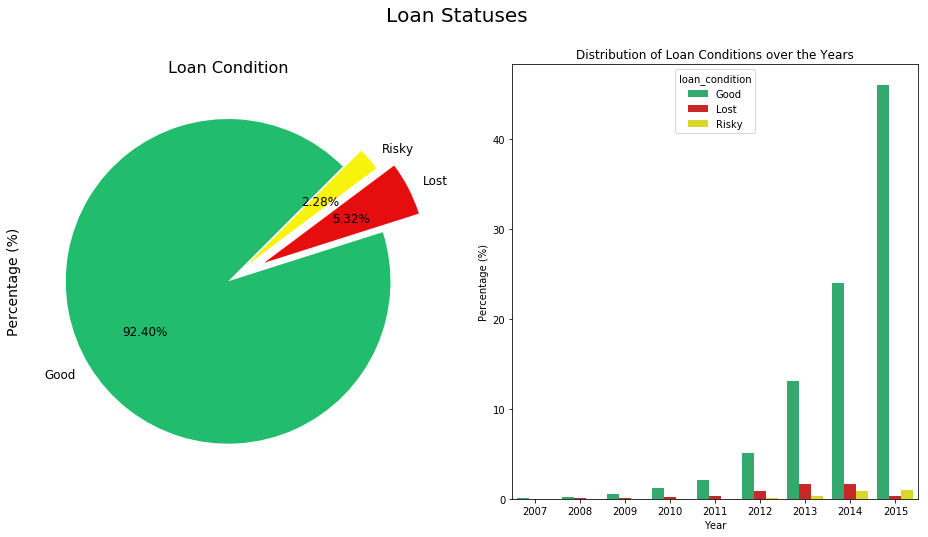

In [10]:
# Visualize the loan status distribution using a pie chart and bar chart.
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#21bc6c", "#e50d0d", "#f7f30c"]
palette = ["#21bc6c", "#e50d0d", "#f7f30c"]
labels ="Good", "Lost", "Risky"

plt.suptitle('Loan Statuses', fontsize=20)

loan_df["loan_condition"].value_counts().plot.pie(explode=[0,0.25, 0.15], autopct='%1.2f%%', ax=ax[0], colors=colors, 
                                             labels=labels, fontsize=12, startangle=45)

ax[0].set_title('Loan Condition', fontsize=16)
ax[0].set_xticklabels(['Good', 'Lost', 'Risky'], rotation='horizontal')
ax[0].set_ylabel("Percentage (%)", fontsize=14)


ax[1] = sns_barplot = sns.barplot(x='year', y='loan_amnt', hue='loan_condition', data=loan_df, palette=palette, estimator=lambda x: len(x) / len(loan_df) * 100)
ax[1].set(xlabel='Year', ylabel='Percentage (%)')
ax[1].set(title='Distribution of Loan Conditions over the Years')
plt.show()



# Finding 1
<a id="finding1"></a>
The pie chart above shows how risky is to invest in Lending Club in general.<br>
An investor may expect a loss of around 5\% for his/her investment in average.<br>
Moreover, the bar chart on the right hand side shows the loan amount distribution over the years.<br>
This bar chart reveals an increase in lost and risky loans in 2013 and 2014 as compared to other years in the chart.<br>

__Question:__ Someone may wonder if the higher risk in 2013 and 2014 was compensated by an intereset rate increase to incentivize investors.<br>
 
__Answer:__ The bar chart created one cell below shows the highest interest rates took place in 2013 and 2014 with average intereset rates of 14.53% and 13.77%, respectively. This means that investors are incentivized by higher interest rates as a response of a higher risk in 2013 and 2014. 

In [11]:
int_rate_df_grouped_by_year = loan_df.groupby("year").agg({'int_rate':np.mean}, axis = 1).reset_index()

layout = go.Layout(
    yaxis=dict(
        title='Average Intereset Rate (%)'
    ),
    xaxis=dict(
        title='Year'
    ),
    title = 'Average Intereset Rate over the Years [2007 - 2015]'
)

data = [go.Bar(
            x=int_rate_df_grouped_by_year['year'],
            y=int_rate_df_grouped_by_year['int_rate']
    )]


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

Related to the first finding, another interesting data exploration can be the relation between the loan statuses and the borrower grades.<br>
Please note that the borrower grades are assigned by Lending Club to show the risk category of each borrower.

In [12]:
loan_df_grouped = loan_df.groupby(["grade", "loan_condition"]).agg({'loan_condition': 'count'})


loan_df_grouped["percentage"] = loan_df_grouped.groupby(level=0).apply(lambda x:
                                                  100 * x / float(x.sum()))


loan_df_grouped.drop('loan_condition', axis=1, inplace=True)


df = pd.DataFrame({'x': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                        'y1':loan_df_grouped.unstack(level=0).iloc[0], 
                        'y2':loan_df_grouped.unstack(level=0).iloc[1], 
                        'y3':loan_df_grouped.unstack(level=0).iloc[2]})


Good = go.Bar(
    x=df['x'],
    y=df['y1'],
    name='Good',
    marker=dict(
        color='#21bc6c'
    ),
    text = '%'
)


Lost = go.Bar(
    x=df['x'],
    y=df['y2'],
    name='Lost',
    marker=dict(
        color='#e50d0d'
    ),
    text = '%'
)

Risky = go.Bar(
    x=df['x'],
    y=df['y3'],
    name='Risky',
    marker=dict(
        color='#f7f30c'
    ),
    text = '%'
)




data = [Good, Lost, Risky]
layout = go.Layout(
    yaxis=dict(
        title='Percentage (%)'
    ),
    xaxis=dict(
        title='Borrower Grade'
    ),
    barmode='stack',
    title = 'Percentage of Good, Lost, and Risky Loans Grouped by Grade'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='stacked-bar')


In [13]:
# Summary statistics of the stacked bar chart given above.
loan_df_grouped.unstack()

percentage                     
loan_condition       Good       Lost     Risky
grade                                         
A               97.528373   1.802945  0.668682
B               94.713497   3.850944  1.435559
C               92.250061   5.348572  2.401367
D               88.634963   7.879348  3.485689
E               86.217382   9.358603  4.424015
F               80.981515  13.477393  5.541092
G               76.881035  16.141374  6.977592

# Finding 2
<a id="finding1"></a>
The stacked bar chart and the summary statistics given above reveals a negative correlation between the borrowers' grade (from A to G) and the number of lost and risky loans. This means that the credibility of borrower decreases as the risk factor increases. 

__Question:__ Related to the stacked bar chart above, someone may wonder whether the increasing risk factor (i.e., increasing number of risky and lost loans as the barrower grade changes from A to G) for investors is incentivized by an increase in interest rate.<br>
 
__Answer:__ The bar chart one cell below shows the increase in average interest rate as the borrower grade changes from A to G (i.e., credibility of the borrower decreases). This means that investors are encouraged by increasing intereset rates (7.42% for grade A to 25.62% for grade G) to take higher risks for higher returns.  

In [ ]:
int_rate_df_grouped_by_grade = loan_df.groupby("grade").agg({'int_rate':np.mean}, axis = 1).reset_index()

layout = go.Layout(
    yaxis=dict(
        title='Average Intereset Rate (%)'
    ),
    xaxis=dict(
        title='Grade'
    ),
    title = 'Average Intereset Rate by Grade'
)

data = [go.Bar(
            x=int_rate_df_grouped_by_grade['grade'],
            y=int_rate_df_grouped_by_grade['int_rate']
    )]


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [ ]:
# To find the percentage of the fulfilled loan amount by the investors according to grade,
# the total of the invested loan amount by the investors is divided by 
# the total of the listed amount of the loan applied for by the borrower.
invested_sum_df_grouped_by_grade = loan_df.groupby("grade").agg({'funded_amnt_inv':np.sum}, axis = 1).reset_index()
loan_amnt_sum_df_grouped_by_grade = loan_df.groupby("grade").agg({'loan_amnt':np.sum}, axis = 1).reset_index()
invested_mean_df_grouped_by_grade = loan_df.groupby("grade").agg({'funded_amnt_inv':np.mean}, axis = 1).reset_index()


inv_percent_df = pd.DataFrame(invested_sum_df_grouped_by_grade['funded_amnt_inv']
                              /loan_amnt_sum_df_grouped_by_grade['loan_amnt'] * 100)
grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
inv_percent_df.insert(0, column='Grade', value=grades)

inv_percent_df.insert(2, column='Mean of the Applied Loan Amount', value=invested_mean_df_grouped_by_grade['funded_amnt_inv'])
inv_percent_df.columns = ['Grade','Fulfilment Percentage', 'Applied Loan Amount']

inv_percent_df


# Summary:
<a id="summary"></a>

In this notebook, Lending Club Loans are analyzed and the following findings are revealed:<br>

## Finding 1
The loans of Lending Club consist of good, risky, and lost loans with shares of 92.40%, 2.28%, and 5.32%, respectively. Therefore, an investor may experience an investment loss of 5.32% in average.<br>
Moreover, the statistics in [Finding1](#finding1) showed that lost and risky loans were higher in 2013 and 2014 than those in other years (i.e., 2005 - 2012 and 2015).

## Findings 2
A negative correlation exists between the grades of borrowers and the number of lost and risky loans. The percantage of lost loans increases from 1.80% to 16.14% in average as the grades of borrowers changes from A to to G. The statistics in [Finding2](#finding2) showed that this credibility gap between the borrowers with highest and lowest grades is compansated by an average interest-rate increase of 18.38% (avg interest rate for grade G - avg interest rate for grade A) as the grade changes from A and to G. This may create an incentive for the investors to take higher risks to gain higher returns. This finding is also supported by the almost-equal fulfilment ratios for all grades, as shown in the previous cell. 





In [ ]:
loan_df['revolv_']